In [107]:
#!for w in 8m 4m 2m 1m 512k 256k 128k 64k 32k 28k 16k 4k; do for s in 16m 8m 4m 2m 1m 512k 256k 128k 64k; do rm binfile; python io.py $w $s; done ; done

In [108]:
import pandas as pd
import seaborn as sns 
import numpy as np
import math
from climetlab.utils.humanize import bytes

In [109]:
def get_benchmark_data(prefix, logdir='iologs'):
    import glob
    from collections import defaultdict
    data = defaultdict(dict)
    writes = []
    seeks = []
    for g in glob.glob(f'{logdir}/{prefix}io.*.csv'):
        d = pd.read_csv(g).columns
        seek, write, time = d
        seek = int(seek)
        write = int(write)
        #if seek==write:continue
        data[seek][write] = [float(time)/60.]
        writes.append(write)
        seeks.append(seek)
    writes = sorted(list(set(writes)))
    seeks = sorted(list(set(seeks)))

    idx_w = [bytes(x) for x in writes]
    cols_s =  ["Seeks of " + bytes(x) for x in seeks]
    array = np.random.randn(len(idx_w), len(cols_s)) * np.nan

    for is_, s in enumerate(seeks):
        for iw, w in enumerate(writes):
            if not w in data[s]:
                continue
            v = data[s][w]
            v = v[-1] # only the latest
            array[iw, is_] = v
    return pd.DataFrame(array, index=idx_w, columns=cols_s)

<AxesSubplot:>

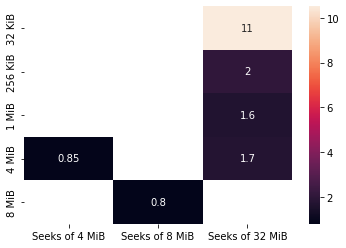

In [110]:
sns.heatmap(get_benchmark_data(''), annot=True) 

<AxesSubplot:>

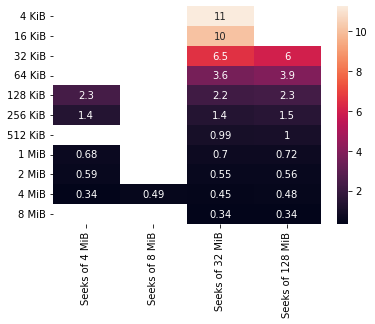

In [111]:
sns.heatmap(get_benchmark_data('read'), annot=True) 

<AxesSubplot:>

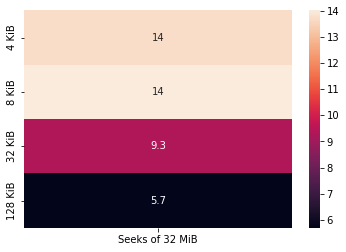

In [117]:
sns.heatmap(get_benchmark_data('read8times'), annot=True) 

<AxesSubplot:>

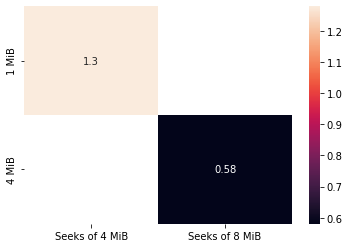

In [112]:
sns.heatmap(get_benchmark_data('readanddrop'), annot=True) 

<AxesSubplot:>

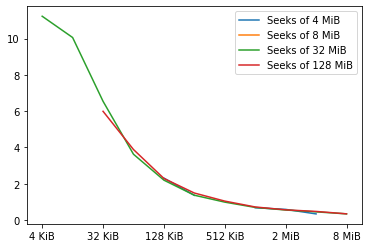

In [113]:
get_benchmark_data('read').plot()

<AxesSubplot:>

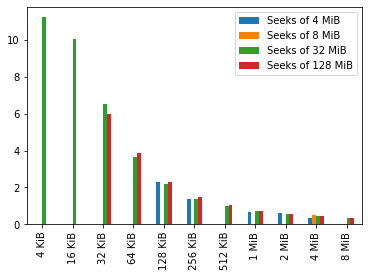

In [114]:
get_benchmark_data('read').plot.bar()

<AxesSubplot:>

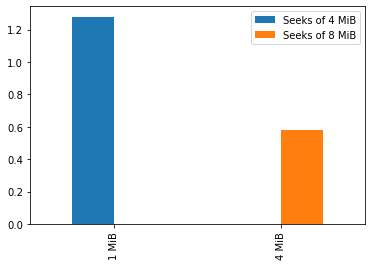

In [115]:
get_benchmark_data('readanddrop').plot.bar()